In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [45]:
data=pd.read_csv("bank-full.csv",sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [46]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [47]:
del data['month']
del data['poutcome']
del data['contact']
del data['pdays']
del data['day']

In [48]:
data

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,0,no
4,33,unknown,single,unknown,no,1,no,no,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,0,no


In [49]:
inputs=data.iloc[:,:-1]
target=data.iloc[:,-1]
inputs

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous
0,58,management,married,tertiary,no,2143,yes,no,261,1,0
1,44,technician,single,secondary,no,29,yes,no,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,0
4,33,unknown,single,unknown,no,1,no,no,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,0
45207,71,retired,divorced,primary,no,1729,no,no,456,2,0
45208,72,retired,married,secondary,no,5715,no,no,1127,5,3
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,0


In [50]:
target=pd.get_dummies(target)
target


,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45206,0,1
45207,0,1
45208,0,1
45209,1,0


In [51]:
del target['no']

In [52]:
inputs=pd.get_dummies(inputs)

In [53]:
inputs

,age,balance,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,261,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
1,44,29,151,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,33,2,76,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,47,1506,92,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,1,0
4,33,1,198,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
45207,71,1729,456,2,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
45208,72,5715,1127,5,3,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
45209,57,668,508,4,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [54]:
del inputs['loan_no']
del inputs['housing_no']
del inputs['default_no']


In [55]:
inputs

,age,balance,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,58,2143,261,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,44,29,151,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,33,2,76,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1
3,47,1506,92,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,33,1,198,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
45207,71,1729,456,2,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
45208,72,5715,1127,5,3,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
45209,57,668,508,4,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [56]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=365)

In [57]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
model.coef_

array([[-1.74770750e-02,  2.28363643e-05,  3.71098489e-03,
        -1.56432061e-01,  1.40372589e-01,  2.54902582e-03,
        -5.21904599e-01, -1.15517841e-01, -6.63184357e-02,
        -2.20689696e-01,  4.88394418e-01, -8.23961894e-02,
        -1.97767868e-01,  1.07572015e-01, -2.07602444e-01,
        -9.26017722e-03, -2.10136128e-02, -8.22856842e-02,
        -4.67800919e-01, -2.93868800e-01, -2.91181878e-01,
        -3.11635702e-01, -2.26478456e-01, -1.46593662e-02,
        -5.75033056e-02, -1.27559066e+00, -5.47367127e-01]])

In [59]:
model.intercept_

array([-0.84482457])

In [60]:
pred=model.predict(x_test)

In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7955
           1       0.60      0.20      0.30      1088

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



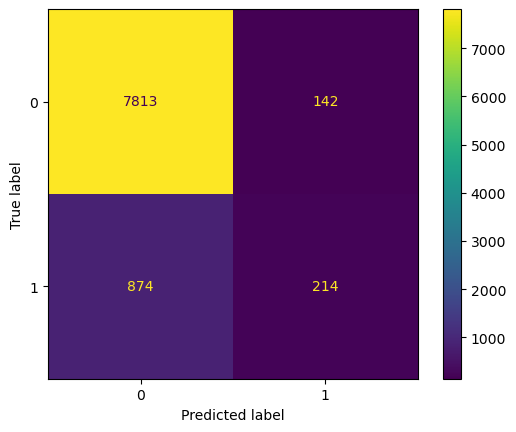

In [62]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,pred))
cm.plot()

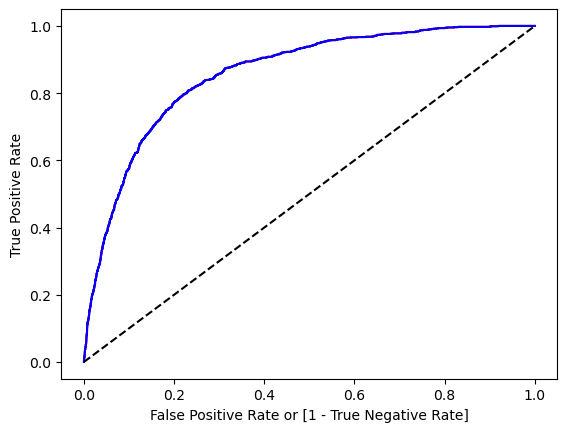

auc accuracy: 0.5894203839612526


In [63]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,color='blue',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)
